In [26]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
# Define the lyrics of the song
data="Coding interviews require a different set of skillset compared to practical software engineering. Interviews mainly test on algorithms and data structures, which most software developers do not come across in their day-day work. I’ve always wanted to work on my interviewing skillsets so that when the opportunity to interview arises, I’ll be ready for the interview. My efforts to incorporate Leetcode as a daily route was sporadic over the last few years. There will be times when I get really motivated and managed to leetcode almost daily but eventually when life comes knocking back, the routine started to wane off. Since December last year, I had another surge of motivation to leetcode. But this time round, I was ready, prepared and equipped with the several habit tips from the book “Atomic Habits” by James Clear. Habits are a dopamine-driven feedback loop. When dopamine rises, so does our motivation to act. It is the anticipation of a reward not the fulfilment of it that gets us to take action. The human brain evolved to prioritise immediate rewards over delayed rewards. To get a habit to stick you need to feel immediately successful — even if it’s in a small way. Habit tracking: simple way to measure whether you did a habit. Habit tracking makes act of performing your act attractive. Tracking can become its own form of reward. It is satisfying to cross an item off your to-do list. I kept a to-do list and a habit tracker on my calendar of my progress on Leetcode and other habits that I’m trying to build."
# Split the log string per line and put in a list
corpus = data.lower().split('.')

# Preview the result
print(corpus)

['coding interviews require a different set of skillset compared to practical software engineering', ' interviews mainly test on algorithms and data structures, which most software developers do not come across in their day-day work', ' i’ve always wanted to work on my interviewing skillsets so that when the opportunity to interview arises, i’ll be ready for the interview', ' my efforts to incorporate leetcode as a daily route was sporadic over the last few years', ' there will be times when i get really motivated and managed to leetcode almost daily but eventually when life comes knocking back, the routine started to wane off', ' since december last year, i had another surge of motivation to leetcode', ' but this time round, i was ready, prepared and equipped with the several habit tips from the book “atomic habits” by james clear', ' habits are a dopamine-driven feedback loop', ' when dopamine rises, so does our motivation to act', ' it is the anticipation of a reward not the fulfilm

In [42]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index '0' which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print("word index dictionary: ", tokenizer.word_index)
print("Total words: ", total_words)

word index dictionary:  {'to': 1, 'a': 2, 'the': 3, 'of': 4, 'habit': 5, 'and': 6, 'on': 7, 'my': 8, 'when': 9, 'leetcode': 10, 'i': 11, 'do': 12, 'that': 13, 'act': 14, 'it': 15, 'tracking': 16, 'interviews': 17, 'software': 18, 'not': 19, 'in': 20, 'day': 21, 'work': 22, 'so': 23, 'interview': 24, 'be': 25, 'ready': 26, 'daily': 27, 'was': 28, 'over': 29, 'last': 30, 'get': 31, 'but': 32, 'off': 33, 'motivation': 34, 'habits': 35, 'dopamine': 36, 'is': 37, 'reward': 38, 'rewards': 39, 'you': 40, 'way': 41, 'your': 42, 'list': 43, 'coding': 44, 'require': 45, 'different': 46, 'set': 47, 'skillset': 48, 'compared': 49, 'practical': 50, 'engineering': 51, 'mainly': 52, 'test': 53, 'algorithms': 54, 'data': 55, 'structures': 56, 'which': 57, 'most': 58, 'developers': 59, 'come': 60, 'across': 61, 'their': 62, 'i’ve': 63, 'always': 64, 'wanted': 65, 'interviewing': 66, 'skillsets': 67, 'opportunity': 68, 'arises': 69, 'i’ll': 70, 'for': 71, 'efforts': 72, 'incorporate': 73, 'as': 74, 'rou

In [43]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:
    # Tokenize the current line
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Loop over the line to generate subphrases
    for i in range(1, len(token_list)):
        # Generate the subphrase
        n_gram_sequence = token_list[:i+1]
        # Append the subphrase to the sequence list
        input_sequences.append(n_gram_sequence)

# get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, padding='pre', maxlen=max_sequence_len))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [44]:
# Get sample sentence
sentence = corpus[0].split()
print('Sample sentence', sentence)

# Initialize token list
token_list = []
for word in sentence:
    token_list.append(tokenizer.word_index[word])

print(token_list)

Sample sentence ['coding', 'interviews', 'require', 'a', 'different', 'set', 'of', 'skillset', 'compared', 'to', 'practical', 'software', 'engineering']
[44, 17, 45, 2, 46, 47, 4, 48, 49, 1, 50, 18, 51]


In [45]:
elem_number = 6
print(xs[elem_number])
print(tokenizer.sequences_to_texts([xs[elem_number]]))

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 44 17 45  2
 46 47  4]
['coding interviews require a different set of']


In [46]:
print(ys[elem_number])
print(np.argmax(ys[elem_number]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
48


In [47]:
# Build the model
model = Sequential([
    Embedding(total_words, 64, input_length = max_sequence_len-1),
    Bidirectional(LSTM(20)),
    Dense(total_words, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 27, 64)            10752     
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               13600     
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 168)               6888      
                                                                 
Total params: 31,240
Trainable params: 31,240
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(xs, ys, epochs=500)

Epoch 1/500
8/8 [==============================] - 2s 13ms/step - loss: 5.1249 - accuracy: 0.0040
Epoch 2/500
8/8 [==============================] - 0s 9ms/step - loss: 5.1129 - accuracy: 0.0280
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 5.1011 - accuracy: 0.0680
Epoch 4/500
8/8 [==============================] - 0s 9ms/step - loss: 5.0823 - accuracy: 0.0560
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 5.0487 - accuracy: 0.0480
Epoch 6/500
8/8 [==============================] - 0s 10ms/step - loss: 5.0026 - accuracy: 0.0400
Epoch 7/500
8/8 [==============================] - 0s 9ms/step - loss: 4.9433 - accuracy: 0.0400
Epoch 8/500
8/8 [==============================] - 0s 10ms/step - loss: 4.8869 - accuracy: 0.0440
Epoch 9/500
8/8 [==============================] - 0s 9ms/step - loss: 4.8303 - accuracy: 0.0440
Epoch 10/500
8/8 [==============================] - 0s 10ms/step - loss: 4.7805 - accuracy: 0.0520
Epoch 11/500
8/8 [=======

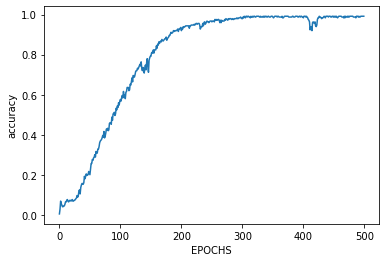

In [49]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel('EPOCHS')
    plt.ylabel(string)
    plt.show

plot_graphs(history, 'accuracy')

In [53]:
# Define seed text
seed_text = "Laurence wants to"

# Define total words to predict
next_words = 20

# Loop until desired length is reached
for _ in range(next_words):
    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Pad the sequences
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    
    # Feed to the model and get the probabiliteies for each index
    probabilities = model.predict(token_list)
    
    # Get the index with highest probability
    predicted = np.argmax(probabilities, axis=-1)[0]

    # Ignore if index is 0 cause that is just the padding
    if predicted != 0:
        # Look up the word associated with the index.
        output_word = tokenizer.index_word[predicted]

        # compine with the seed text
        seed_text += " " + output_word

print(seed_text)

Laurence wants to get a habit to stick you need to feel immediately successful — even if it’s in a small way small


In [52]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

	# Convert the seed text to a token sequence
  token_list = tokenizer.texts_to_sequences([seed_text])[0]

	# Pad the sequence
  token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	
	# Feed to the model and get the probabilities for each index
  probabilities = model.predict(token_list)

  # Pick a random number from [1,2,3]
  choice = np.random.choice([1,2,3])
	
  # Sort the probabilities in ascending order 
  # and get the random choice from the end of the array
  predicted = np.argsort(probabilities)[0][-choice]

	# Ignore if index is 0 because that is just the padding.
  if predicted != 0:
		
		# Look up the word associated with the index. 
	  output_word = tokenizer.index_word[predicted]

		# Combine with the seed text
	  seed_text += " " + output_word

# Print the result	
print(seed_text)

Laurence went to Dublin efforts to as incorporate the cross a immediately route over daily sporadic last arises rewards to build james engineering not off in work to in work the the is i’ll be your act makes act tracking simple to act tracking makes to act attractive to be act own the tracking attractive act on attractive act to be off need leetcode small that off the off the it’s need to take interview action action build take build action action wane work on progress test leetcode other i’m back daily back the trying to wane routine build off own off need to
